One Class Surrounding another Class. Bidimensional.
10 batches of 262 instances



METHOD: Static knn as classifier
Execution time:  0.03229669135802469
Average MCC:  0.980178372574
Average error: 1.831
Average macro-F1: 0.989010989010989
Average micro-F1: 0.99
Average Accuracy:  98.169
Standard Deviation:  0.850522780412
Variance:  0.723389


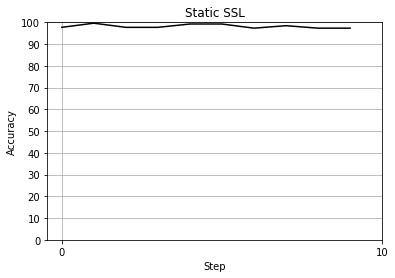

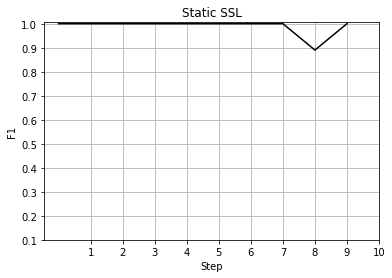

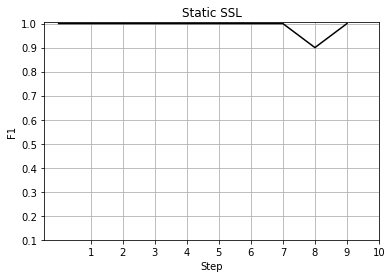




METHOD: Sliding knn as classifier
Execution time:  0.028294320987654276
Average MCC:  0.966666666667
Average error: 1.412
Average macro-F1: 0.9803921568627452
Average micro-F1: 0.99
Average Accuracy:  98.588
Standard Deviation:  0.726633332569
Variance:  0.527996


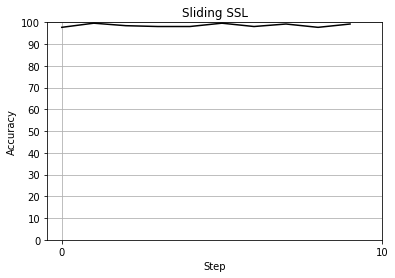

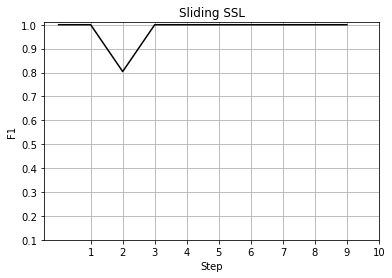

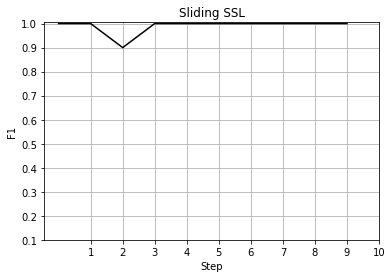




METHOD: Incremental knn as classifier
Execution time:  0.1637353086419755
Average MCC:  1.0
Average error: 1.526
Average macro-F1: 1.0
Average micro-F1: 1.0
Average Accuracy:  98.474
Standard Deviation:  0.819673105573
Variance:  0.671864


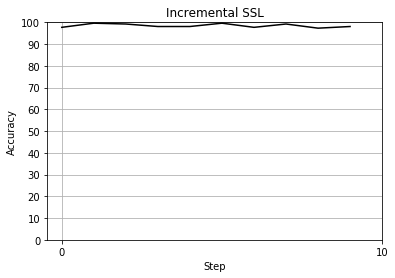

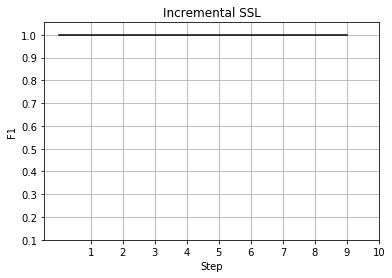

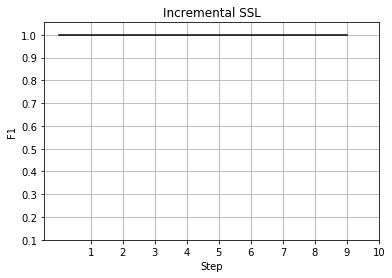




METHOD: knn as classifier and kde as core support extraction with cutting data method
Execution time:  0.1261677037037039
Average MCC:  0.916382874793
Average error: 3.094
Average macro-F1: 0.9479166666666666
Average micro-F1: 0.9600000000000002
Average Accuracy:  96.906
Standard Deviation:  1.07358464967
Variance:  1.152584


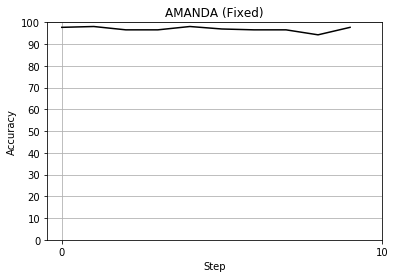

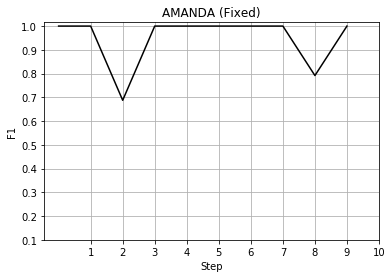

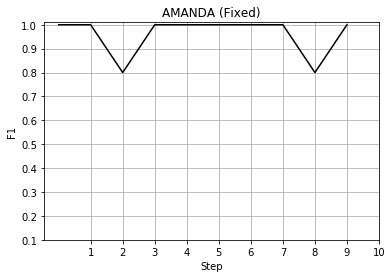




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  0.13793264197530863
Average MCC:  0.943042928249
Average error: 3.474
Average macro-F1: 0.9666666666666666
Average micro-F1: 0.97
Average Accuracy:  96.526
Standard Deviation:  2.3664623386
Variance:  5.600144


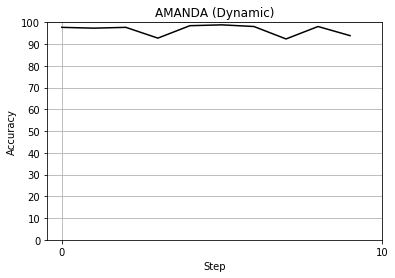

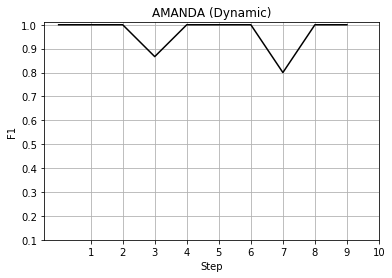

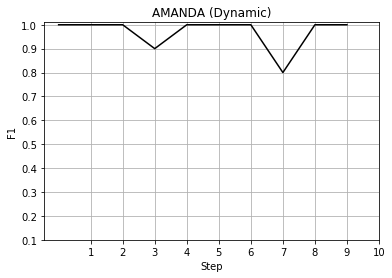




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  7.288848592592592
Average MCC:  0.875174961987
Average error: 3.322
Average macro-F1: 0.9262254901960784
Average micro-F1: 0.9400000000000001
Average Accuracy:  96.678
Standard Deviation:  1.48810483502
Variance:  2.214456


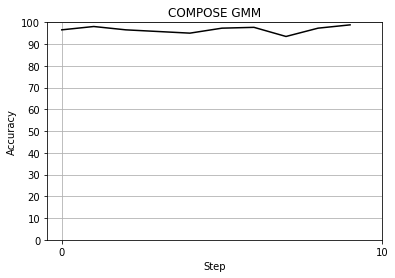

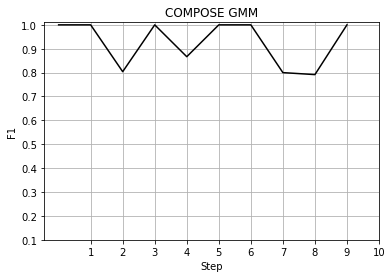

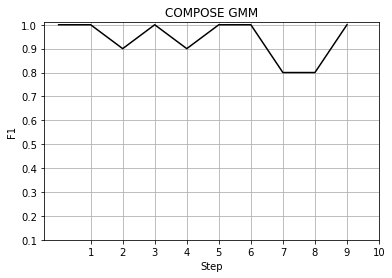




Method: Level IW
Execution time:  7.288848592592592
Average MCC:  0.0751628531781
Average macro-F1: 0.49044455544455545
Average micro-F1: 0.5700000000000001
Average Accuracy:  90.801904
Standard Deviation:  16.5147633596

C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Variance:  272.737408824


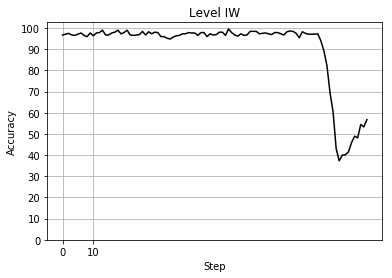

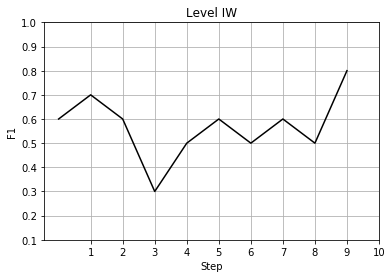

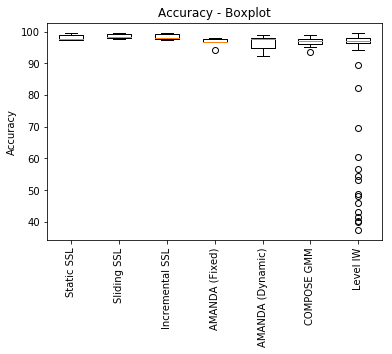

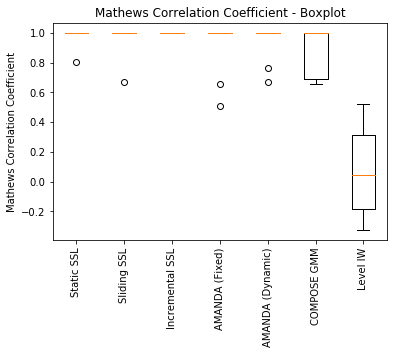

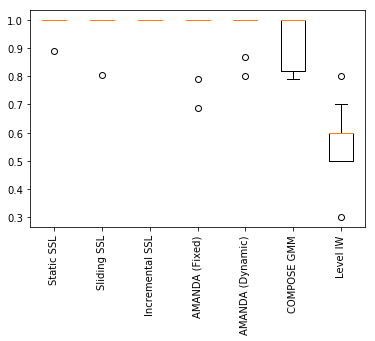

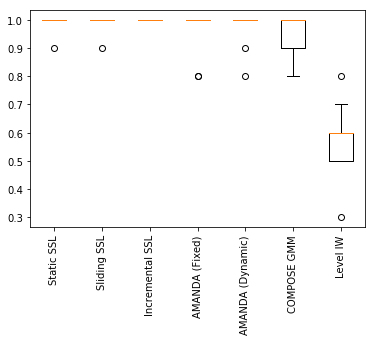

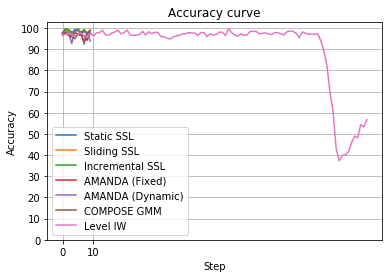

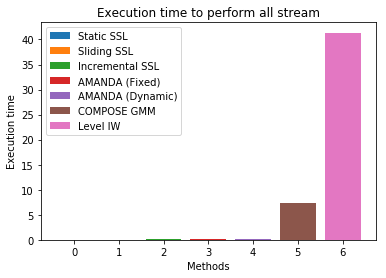

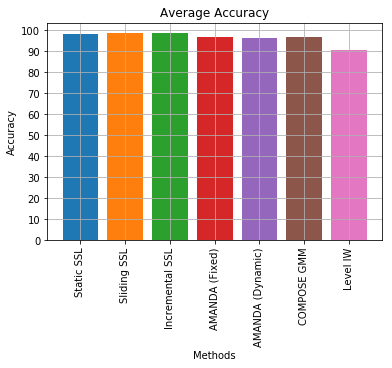

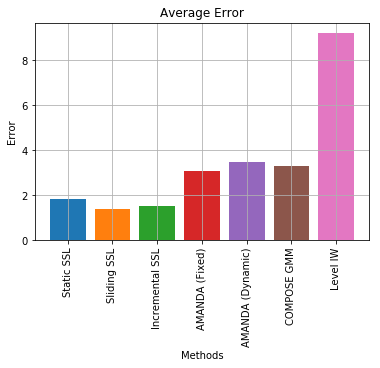

Error reduction: 0.426814982326
Error reduction: 0.310688710285
Error reduction: -1.28655685603
Error reduction: -1.6736444295
Error reduction: -1.51880940012
Error reduction: -7.50450345832


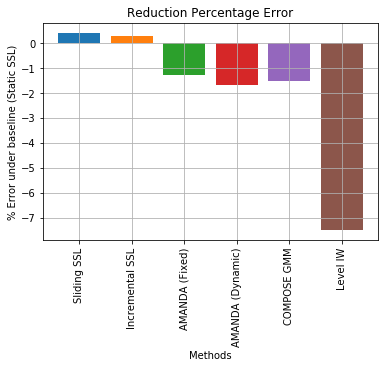

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version
from methods import prequential_amanda_fixed
from methods import prequential_amanda_dynamic
from methods import prequential_static_classifier
from methods import prequential_deslizante_LN
from methods import prequential_incremental_LN
from methods import prequential_compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    # sgd=sthocatic gradient descent, lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    sslClassifier = 'knn'
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = True
    externalResults = []
    plot_animation = False
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCSurr(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))
    '''
    # Static SSL
    #experiments[0] = Experiment(static_classifier, 7, clfName=sslClassifier)
    
    # Sliding SSL
    #experiments[1] = Experiment(deslizante_LN, 7, clfName=sslClassifier)
    
    # Incremental SSL
    #experiments[2] = Experiment(incremental_LN, 7, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    #experiments[3] = Experiment(amanda_fixed, 7, 0.7, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    #experiments[4] = Experiment(amanda_dynamic, 11, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 11, 0.7)
    '''
    
    #prequential evaluation
    steps = 10
    dataValues, dataLabels = dataValues[:labeledData], dataLabels[:labeledData]
    labeledData = int(0.05*len(dataLabels))
    experiments[0] = Experiment(prequential_static_classifier, 7, clfName=sslClassifier)
    experiments[1] = Experiment(prequential_deslizante_LN, 7, clfName=sslClassifier)
    experiments[2] = Experiment(prequential_incremental_LN, 7, clfName=sslClassifier)
    experiments[3] = Experiment(prequential_amanda_fixed, 7, 0.75, "kde", sslClassifier)
    experiments[4] = Experiment(prequential_amanda_dynamic, 11, None, "kde", clfName=sslClassifier)
    experiments[5] = Experiment(prequential_compose_gmm_version, 11, 0.7)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '1CSurr', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw[:labeledData], "accuracies":originalAccsLevelIw[:labeledData], "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, plot_animation, externalResults)
    

if __name__ == "__main__":
    main()